# Mean-Field analysis for SDE with quadratic non-linearity and additive noise

Notebook for Fig. 6 of [The two-particle irreducible effective action for classical stochastic processes](https://doi.org/10.1088/1751-8121/ac73c6).

In [1]:
using DrWatson
@quickactivate "The Two-Particle Irreducible Effective Action for Classical Stochastic Processes"

using DifferentialEquations, PyPlot
PyPlot.plt.style.use("./paper.mplstyle")

In [2]:
# Parameters
α = 1.0
D = 1.50
β = 0.25 # 0.15;

# potential
V(α, β, x) = -(α * x^2 / 2 + β * x^3 / 3);

In [3]:
X = -10:1e-3:10 |> collect;

# fixed points
x₁ = 0.0
x₂(α, β) = -α/β;

In [4]:
F(x) = -(α^2 * x^2 / 2 + α * β * x^3 + β^2 * x^4 / 2);

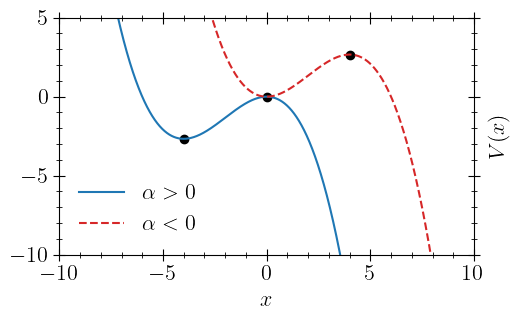

In [5]:
fig = figure(figsize=(5, 3))

numPlots = 1

ax = fig.add_subplot(1, numPlots, 1)

plot(X, V.(α, β, X), label="\$ \\alpha > 0 \$")
plot(X, V.(-α, β, X), "--C3", label="\$ \\alpha < 0 \$")

scatter(x₁, V(α, β, x₁), c="k")
scatter(x₂(α, β), V(α, β, x₂(α, β)), c="k")
scatter(x₂(-α, β), V(-α, β, x₂(-α, β)), c="k")

xlabel("\$ x \$")
ylabel("\$ V(x) \$", labelpad=10.0)
xlim(X[1], X[end])
ylim(-10, 5)
ax.yaxis.set_label_position("right")

legend(frameon=false)
tight_layout(pad=0)
# fig.savefig("../plots/neuron_potential.pdf")